<a href="https://colab.research.google.com/github/Thiruppaavai-TM/drugs-review/blob/main/CTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/combined_dataset.csv')

In [ ]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
data.isna().sum()

uniqueID         0
drugName         0
condition      408
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
data.shape

(135824, 7)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(135416, 7)

In [ ]:
data['date']=pd.to_datetime(data['date'])

In [ ]:
data['date']=data['date'].astype(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135416 entries, 0 to 135823
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     135416 non-null  int64 
 1   drugName     135416 non-null  object
 2   condition    135416 non-null  object
 3   review       135416 non-null  object
 4   rating       135416 non-null  int64 
 5   date         135416 non-null  object
 6   usefulCount  135416 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ MB


In [ ]:
import re
pattern=r'[^a-zA-Z\s]'
data['review']=data['review'].str.replace(pattern,'',regex=True)

In [ ]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,Ive tried a few antidepressants over the years...,10,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",My son has Crohns disease and has done very we...,8,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,Quick reduction of symptoms,9,2017-09-29,3
3,39293,Contrave,Weight Loss,Contrave combines drugs that were used for alc...,9,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,I have been on this birth control for one cycl...,9,2015-10-22,4


In [ ]:
# Since we are going to use the text blob for sentiment analysis we'll deep clean the data(review),like removing the punctuations,stopwords and spl char
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

In [ ]:
# converting into lowercase letters
data.columns=data.columns.str.lower()
# converting the df to sorted df by their uniqueid
data.sort_values(['uniqueid'],inplace=True)

In [ ]:
data['condition'].unique()

array(['Abnormal Uterine Bleeding', 'Birth Control', 'Endometriosis',
       'Amenorrhea', 'Not Listed / Othe', 'Benign Prostatic Hyperplasia',
       'ADHD', 'Interstitial Cystitis', 'Bladder Infection',
       'Heart Attack', 'Angina', 'Rheumatoid Arthritis',
       "Non-Hodgkin's Lymphoma", 'Edema', 'Pain', 'Breast Cance',
       'Actinic Keratosis', 'Bacterial Vaginitis', 'Rosacea', 'Migraine',
       'Cluster Headaches', 'Cyclic Vomiting Syndrome',
       'New Daily Persistent Headache',
       '11</span> users found this comment helpful.', 'Chronic Pain',
       'COPD', 'COPD, Maintenance', 'Irritable Bowel Syndrome', 'Dysuria',
       'Insomnia', 'Pulmonary Hypertension', 'Osteoarthritis',
       'Muscle Pain', 'Gout, Acute', "Behcet's Disease",
       'Skin and Structure Infection', 'Constipation',
       'Constipation, Acute', 'Bowel Preparation', 'Seizures',
       'Diabetes, Type 2', 'min)', 'Polycystic Ovary Syndrome',
       'Insulin Resistance Syndrome', 'emale Infertilit

In [ ]:
data['condition'].nunique()

708

In [ ]:
# top 5 drugname with rating of 10
data[data['rating']==10]['drugname'].value_counts().head()

drugname
Levonorgestrel    516
Phentermine       280
Etonogestrel      241
Varenicline       194
Clonazepam        163
Name: count, dtype: int64

In [ ]:
# top 5 drugname with rating of 1
data[data['rating']==1]['drugname'].value_counts().head()

drugname
Miconazole                           209
Etonogestrel                         186
Ethinyl estradiol / norethindrone    169
Levonorgestrel                       146
Nexplanon                            140
Name: count, dtype: int64

In [ ]:
k=data['usefulcount'].min()
h=data[data['usefulcount']==k]['drugname'].unique()

In [ ]:
h

array(['Medroxyprogesterone', 'Xeljanz XR', 'Fenoprofen', ...,
       'Dinoprostone', 'Mepolizumab', 'Xifaxan'], dtype=object)

In [ ]:
data.at[data['usefulcount'].idxmin(),'drugname']

'Medroxyprogesterone'

In [ ]:
data[data['rating']==0]['drugname'].value_counts().sum()

0

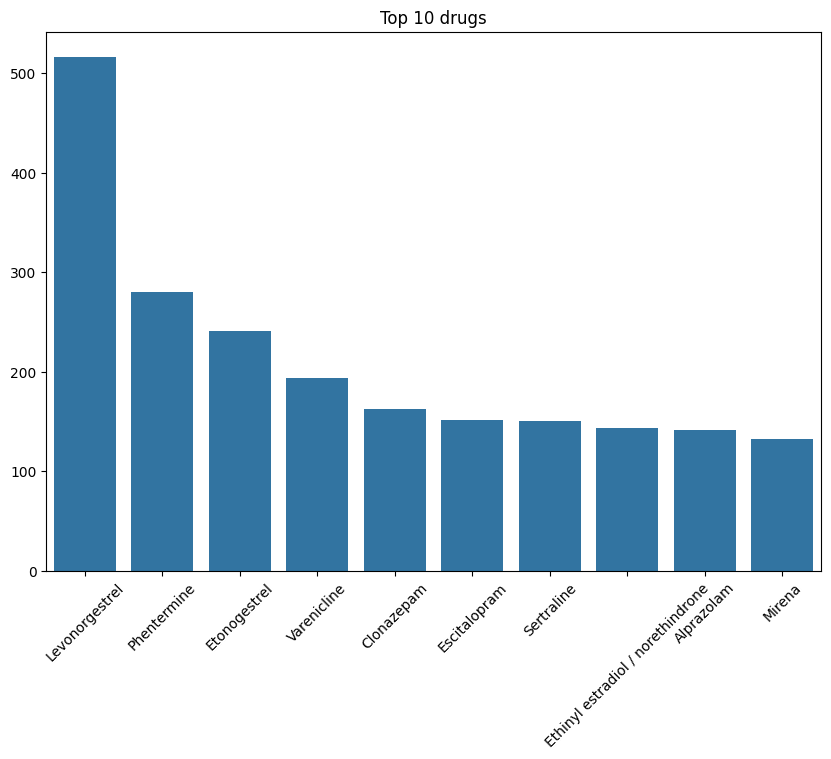

In [ ]:
# basic representation of the top 10 drugs that has 10 ratings
plt.figure(figsize=(10,7))
df=dict(data[data['rating']==10]['drugname'].value_counts())
x1=list(df.keys())
y1=list(df.values())
plt.title('Top 10 drugs')
sns.barplot(x=x1[:10],y=y1[:10])
plt.xticks(rotation=45)
plt.show()

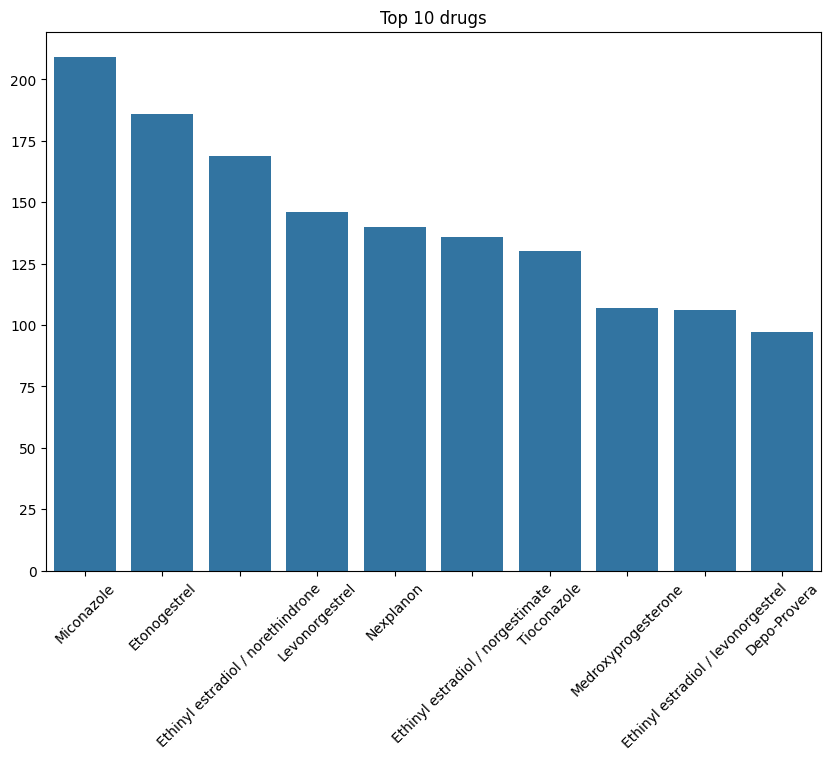

In [ ]:
# Rep for rating of 1
plt.figure(figsize=(10,7))
df=dict(data[data['rating']==1]['drugname'].value_counts())
x1=list(df.keys())
y1=list(df.values())
plt.title('Top 10 drugs')
sns.barplot(x=x1[:10],y=y1[:10])
plt.xticks(rotation=45)
plt.show()

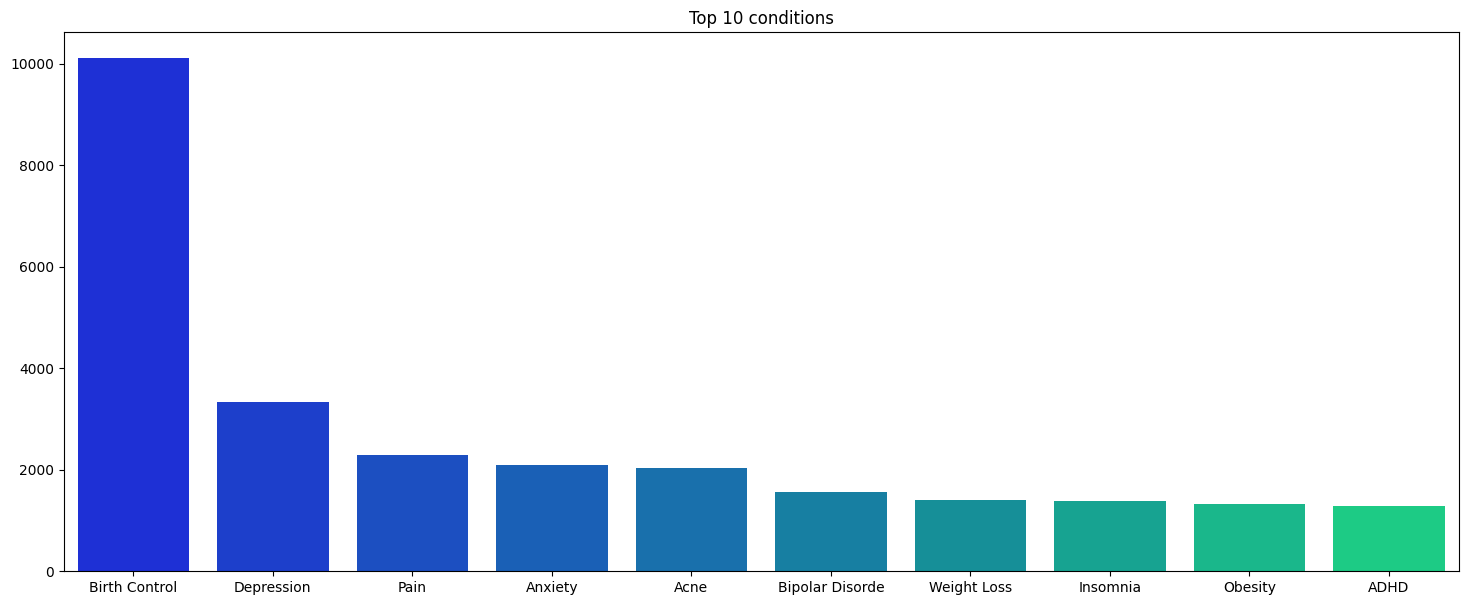

In [ ]:
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
plt.figure(figsize=(18,7))
sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
plt.title('Top 10 conditions')
plt.show()

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'uniqueid'),
  Text(1.5, 0, 'rating'),
  Text(2.5, 0, 'usefulcount')])

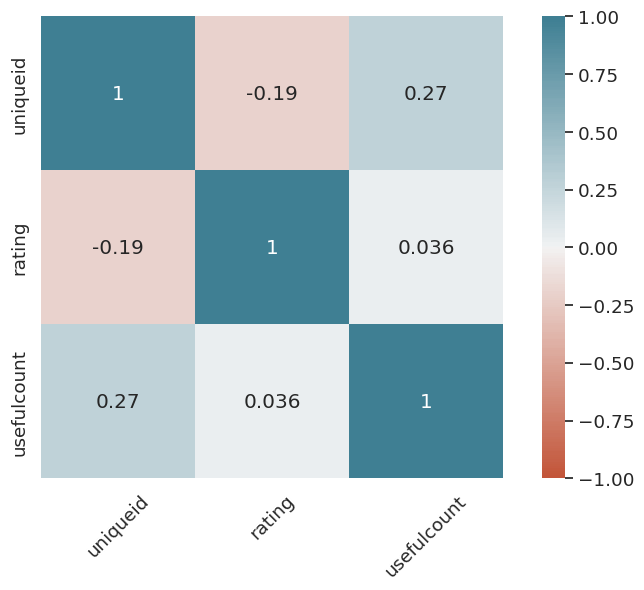

In [ ]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.xticks(rotation=45)

In [ ]:
data['date']=pd.to_datetime(data['date'])

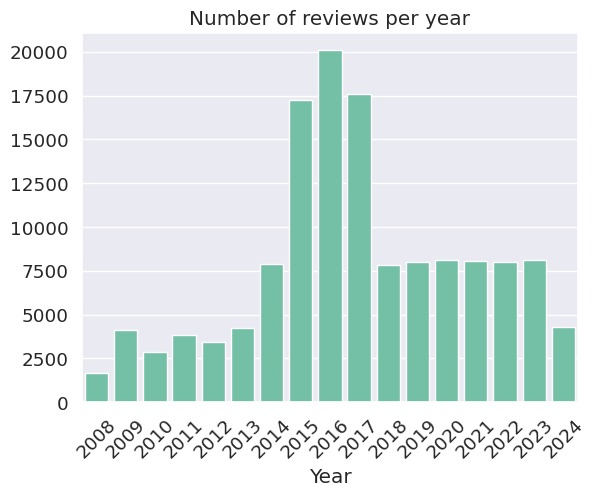

In [ ]:
df1 = data['date'].dt.year.value_counts()
df1 = df1.sort_index()
sns_ = sns.barplot(x = df1.index, y = df1.values, color = 'mediumaquamarine')
plt.title("Number of reviews per year")
plt.xlabel("Year");
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='usefulcount', ylabel='Density'>

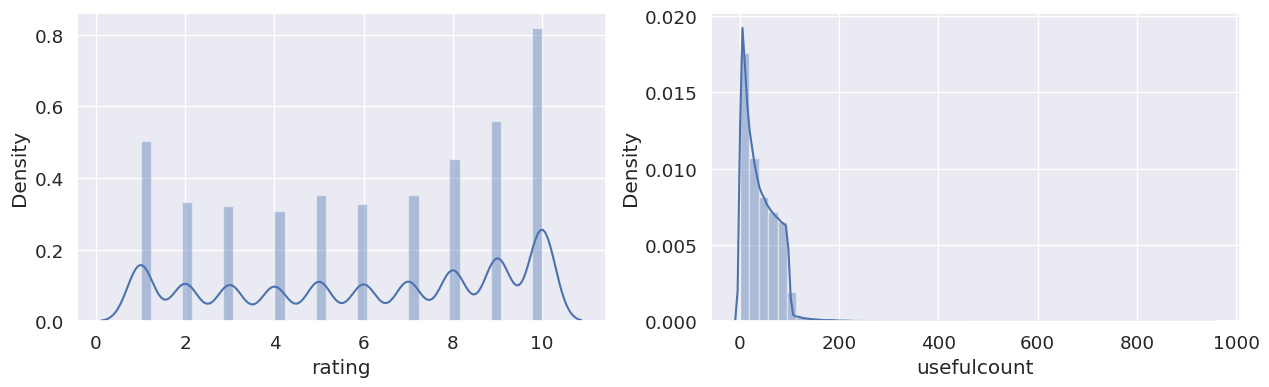

In [ ]:
# distribution of rating and usercounts
plt.figure(figsize=( 15,4))
plt.subplot(1,2,1)
sns.distplot(data['rating'])
plt.subplot(1,2,2)
sns.distplot(data['usefulcount'])

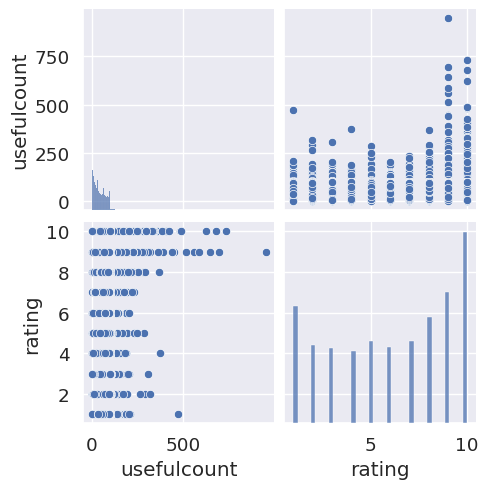

In [ ]:
sns.pairplot(data=data[['usefulcount','rating']],kind='scatter')

In [ ]:
df_ = data[['rating', 'review']]
df_['review'] = data['review'].str.replace("&#039;", "")
df_['review'] = df_['review'].str.replace(r'[^\w\d\s]',' ')

In [ ]:
df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

In [ ]:
unigrams_5 = ngrams(token_review_5, 1)
unigrams_10 = ngrams(token_review_10, 1)

frequency_5 = Counter(unigrams_5)
frequency_10 = Counter(unigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

In [ ]:
df_5.head()

,0,1
0,"(I,)",75021
1,"(and,)",44141
2,"(the,)",38845
3,"(to,)",34296
4,"(my,)",26962


In [ ]:
df_10.head()

,0,1
0,"(I,)",180040
1,"(and,)",102875
2,"(the,)",88299
3,"(to,)",77867
4,"(a,)",72828


In [ ]:
df_5.head()



,0,1
0,"(I,)",75021
1,"(and,)",44141
2,"(the,)",38845
3,"(to,)",34296
4,"(my,)",26962


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords=set(stopwords.words('english'))

In [ ]:
df_['review']=df_['review'].str.lower()

In [ ]:
# removing stopwords
df_['review_1'] = df_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stopwords))

In [ ]:
df_review = " ".join(df_['review_1'])

In [ ]:
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(30))

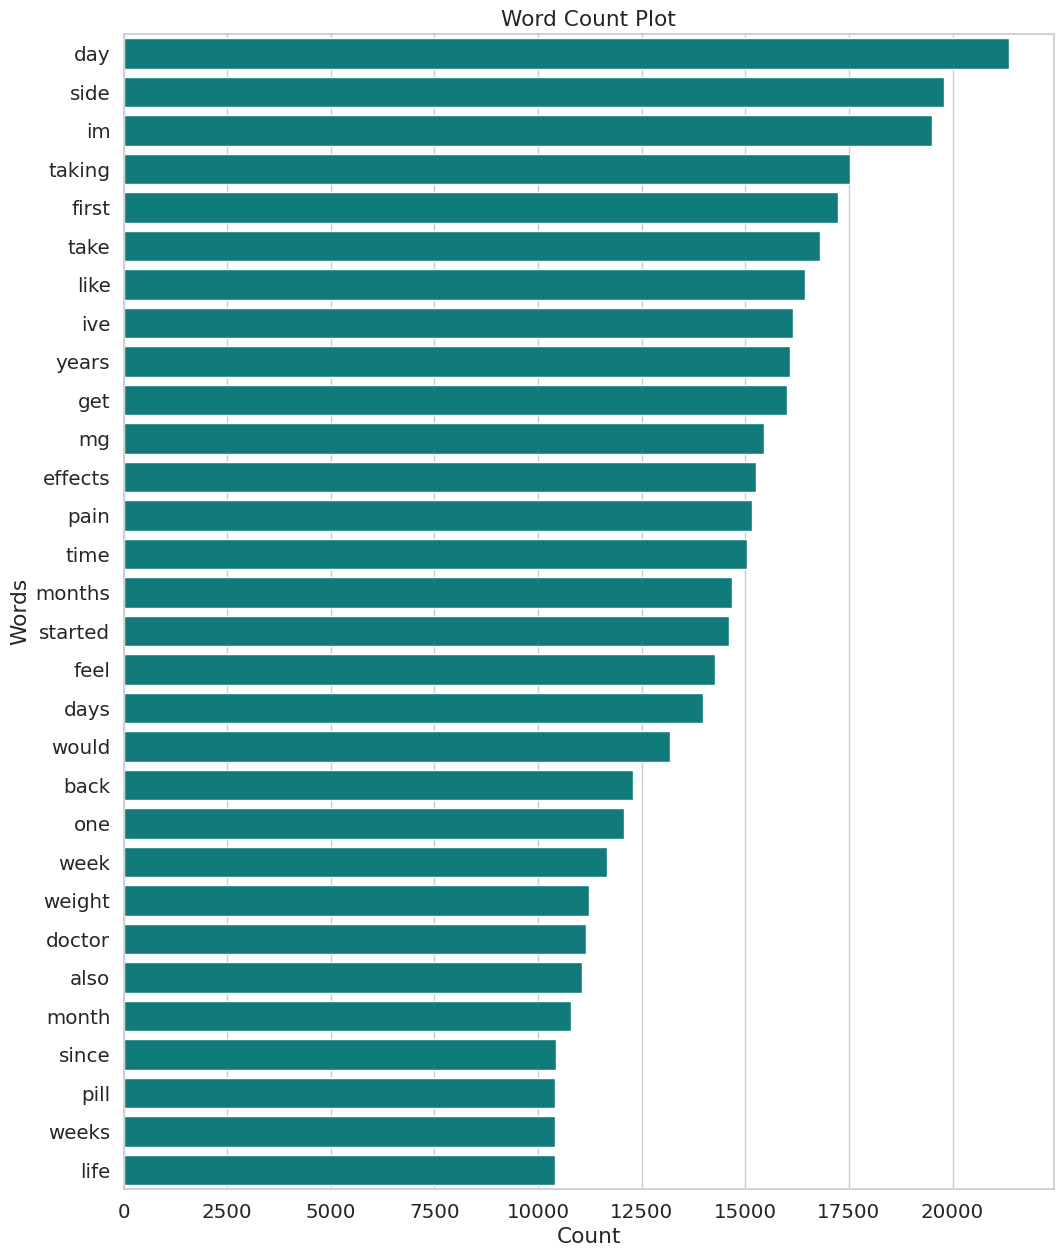

In [ ]:
plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')
word_count = sns.barplot(x = df[1], y = df[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

In [ ]:
# Giving sentiment by rating
data['sentiment_rate'] = data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate
49863,0,Medroxyprogesterone,Abnormal Uterine Bleeding,Been on the depo injection since January had ...,3,2015-10-28,4,0
5448,6,Medroxyprogesterone,Birth Control,This is a horrible shot I got my first shot in...,1,2015-10-24,3,0
39660,15,Medroxyprogesterone,Birth Control,Im and Ive been on this for about years I ha...,9,2015-10-16,7,1
17567,17,Medroxyprogesterone,Endometriosis,I loved how convenient this was one shot every...,3,2015-10-15,4,0
53245,19,Medroxyprogesterone,Birth Control,I took this shot to be safe Im a young teenage...,7,2015-10-14,5,1


In [ ]:
def clean(review):
    # changing to lower case
    lower = review.str.lower()
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [ ]:
data['review_clean'] = clean(data['review'])

In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean
49863,0,Medroxyprogesterone,Abnormal Uterine Bleeding,Been on the depo injection since January had ...,3,2015-10-28,4,0,been on the depo injection since january had ...
5448,6,Medroxyprogesterone,Birth Control,This is a horrible shot I got my first shot in...,1,2015-10-24,3,0,this is a horrible shot i got my first shot in...
39660,15,Medroxyprogesterone,Birth Control,Im and Ive been on this for about years I ha...,9,2015-10-16,7,1,im and ive been on this for about years i ha...
17567,17,Medroxyprogesterone,Endometriosis,I loved how convenient this was one shot every...,3,2015-10-15,4,0,i loved how convenient this was one shot every...
53245,19,Medroxyprogesterone,Birth Control,I took this shot to be safe Im a young teenage...,7,2015-10-14,5,1,i took this shot to be safe im a young teenage...


In [ ]:
# remove stopwords from the cleaned review
data['review_clean_stopwords']=data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))

In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,review_clean_stopwords
49863,0,Medroxyprogesterone,Abnormal Uterine Bleeding,Been on the depo injection since January had ...,3,2015-10-28,4,0,been on the depo injection since january had ...,depo injection since january bleeding stopped ...
5448,6,Medroxyprogesterone,Birth Control,This is a horrible shot I got my first shot in...,1,2015-10-24,3,0,this is a horrible shot i got my first shot in...,horrible shot got first shot august ever since...
39660,15,Medroxyprogesterone,Birth Control,Im and Ive been on this for about years I ha...,9,2015-10-16,7,1,im and ive been on this for about years i ha...,im ive years quite period lasted weeks first m...
17567,17,Medroxyprogesterone,Endometriosis,I loved how convenient this was one shot every...,3,2015-10-15,4,0,i loved how convenient this was one shot every...,loved convenient one shot every three months l...
53245,19,Medroxyprogesterone,Birth Control,I took this shot to be safe Im a young teenage...,7,2015-10-14,5,1,i took this shot to be safe im a young teenage...,took shot safe im young teenager sexually acti...


In [ ]:
# snowball stemmer setup
snowball=SnowballStemmer('english')

In [ ]:
# reducing the words to root words
data['review_clean_stop_stem'] = data['review_clean_stopwords'].apply(lambda x: " ".join(snowball.stem(word) for word in x.split()))

In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,review_clean_stopwords,review_clean_stop_stem
49863,0,Medroxyprogesterone,Abnormal Uterine Bleeding,Been on the depo injection since January had ...,3,2015-10-28,4,0,been on the depo injection since january had ...,depo injection since january bleeding stopped ...,depo inject sinc januari bleed stop anoth inje...
5448,6,Medroxyprogesterone,Birth Control,This is a horrible shot I got my first shot in...,1,2015-10-24,3,0,this is a horrible shot i got my first shot in...,horrible shot got first shot august ever since...,horribl shot got first shot august ever sinc e...
39660,15,Medroxyprogesterone,Birth Control,Im and Ive been on this for about years I ha...,9,2015-10-16,7,1,im and ive been on this for about years i ha...,im ive years quite period lasted weeks first m...,im ive year quit period last week first month ...
17567,17,Medroxyprogesterone,Endometriosis,I loved how convenient this was one shot every...,3,2015-10-15,4,0,i loved how convenient this was one shot every...,loved convenient one shot every three months l...,love conveni one shot everi three month look b...
53245,19,Medroxyprogesterone,Birth Control,I took this shot to be safe Im a young teenage...,7,2015-10-14,5,1,i took this shot to be safe im a young teenage...,took shot safe im young teenager sexually acti...,took shot safe im young teenag sexual activ bi...


In [ ]:
data['day']=data['date'].dt.day
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year

In [ ]:
data.head(3)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,review_clean_stopwords,review_clean_stop_stem,day,month,year
49863,0,Medroxyprogesterone,Abnormal Uterine Bleeding,Been on the depo injection since January had ...,3,2015-10-28,4,0,been on the depo injection since january had ...,depo injection since january bleeding stopped ...,depo inject sinc januari bleed stop anoth inje...,28,10,2015
5448,6,Medroxyprogesterone,Birth Control,This is a horrible shot I got my first shot in...,1,2015-10-24,3,0,this is a horrible shot i got my first shot in...,horrible shot got first shot august ever since...,horribl shot got first shot august ever sinc e...,24,10,2015
39660,15,Medroxyprogesterone,Birth Control,Im and Ive been on this for about years I ha...,9,2015-10-16,7,1,im and ive been on this for about years i ha...,im ive years quite period lasted weeks first m...,im ive year quit period last week first month ...,16,10,2015


In [ ]:
# sentiment by review
# taking only the polarity and not subjectivity
def sentiment(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
data['sentiment'] = sentiment(data['review'])

In [ ]:
data['sentiment_cleaned']=sentiment(data['review_clean_stop_stem'])

In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,review_clean_stopwords,review_clean_stop_stem,day,month,year,sentiment,sentiment_cleaned
49863,0,Medroxyprogesterone,Abnormal Uterine Bleeding,Been on the depo injection since January had ...,3,2015-10-28,4,0,been on the depo injection since january had ...,depo injection since january bleeding stopped ...,depo inject sinc januari bleed stop anoth inje...,28,10,2015,-0.192857,-1.528571e-01
5448,6,Medroxyprogesterone,Birth Control,This is a horrible shot I got my first shot in...,1,2015-10-24,3,0,this is a horrible shot i got my first shot in...,horrible shot got first shot august ever since...,horribl shot got first shot august ever sinc e...,24,10,2015,0.000321,1.323529e-02
39660,15,Medroxyprogesterone,Birth Control,Im and Ive been on this for about years I ha...,9,2015-10-16,7,1,im and ive been on this for about years i ha...,im ive years quite period lasted weeks first m...,im ive year quit period last week first month ...,16,10,2015,0.243333,2.027778e-01
17567,17,Medroxyprogesterone,Endometriosis,I loved how convenient this was one shot every...,3,2015-10-15,4,0,i loved how convenient this was one shot every...,loved convenient one shot every three months l...,love conveni one shot everi three month look b...,15,10,2015,0.071429,3.700743e-17
53245,19,Medroxyprogesterone,Birth Control,I took this shot to be safe Im a young teenage...,7,2015-10-14,5,1,i took this shot to be safe im a young teenage...,took shot safe im young teenager sexually acti...,took shot safe im young teenag sexual activ bi...,14,10,2015,0.203590,2.393939e-01


In [ ]:
np.corrcoef(data['sentiment'], data['rating'])

array([[1.        , 0.15106661],
       [0.15106661, 1.        ]])

In [ ]:
np.corrcoef(data['sentiment_cleaned'], data['rating'])

array([[1.        , 0.11208594],
       [0.11208594, 1.        ]])

In [ ]:
# The Correlation coefficient between the sentiment of the uncleaned review with
# rating is greater than the cleaned review, so now lets try without the snowball stemmer and without removing the stopwords.

data['sentiment_clean_new'] = sentiment(data['review_clean'])



In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,review_clean_stopwords,review_clean_stop_stem,day,month,year,sentiment,sentiment_cleaned,sentiment_clean_new
49863,0,Medroxyprogesterone,Abnormal Uterine Bleeding,Been on the depo injection since January had ...,3,2015-10-28,4,0,been on the depo injection since january had ...,depo injection since january bleeding stopped ...,depo inject sinc januari bleed stop anoth inje...,28,10,2015,-0.192857,-1.528571e-01,-0.192857
5448,6,Medroxyprogesterone,Birth Control,This is a horrible shot I got my first shot in...,1,2015-10-24,3,0,this is a horrible shot i got my first shot in...,horrible shot got first shot august ever since...,horribl shot got first shot august ever sinc e...,24,10,2015,0.000321,1.323529e-02,0.000321
39660,15,Medroxyprogesterone,Birth Control,Im and Ive been on this for about years I ha...,9,2015-10-16,7,1,im and ive been on this for about years i ha...,im ive years quite period lasted weeks first m...,im ive year quit period last week first month ...,16,10,2015,0.243333,2.027778e-01,0.243333
17567,17,Medroxyprogesterone,Endometriosis,I loved how convenient this was one shot every...,3,2015-10-15,4,0,i loved how convenient this was one shot every...,loved convenient one shot every three months l...,love conveni one shot everi three month look b...,15,10,2015,0.071429,3.700743e-17,0.071429
53245,19,Medroxyprogesterone,Birth Control,I took this shot to be safe Im a young teenage...,7,2015-10-14,5,1,i took this shot to be safe im a young teenage...,took shot safe im young teenager sexually acti...,took shot safe im young teenag sexual activ bi...,14,10,2015,0.203590,2.393939e-01,0.203590


In [ ]:
#Word count in each review
data['count_word']=data["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count
data['count_unique_word']=data["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))

#Average length of the words
data["mean_word_len"] = data["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,review_clean_stopwords,...,sentiment_cleaned,sentiment_clean_new,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
49863,0,Medroxyprogesterone,Abnormal Uterine Bleeding,Been on the depo injection since January had ...,3,2015-10-28,4,0,been on the depo injection since january had ...,depo injection since january bleeding stopped ...,...,-1.528571e-01,-0.192857,98,73,537,0,6,15,49,4.469388
5448,6,Medroxyprogesterone,Birth Control,This is a horrible shot I got my first shot in...,1,2015-10-24,3,0,this is a horrible shot i got my first shot in...,horrible shot got first shot august ever since...,...,1.323529e-02,0.000321,141,95,733,0,11,19,77,4.205674
39660,15,Medroxyprogesterone,Birth Control,Im and Ive been on this for about years I ha...,9,2015-10-16,7,1,im and ive been on this for about years i ha...,im ive years quite period lasted weeks first m...,...,2.027778e-01,0.243333,58,42,284,0,4,6,32,3.862069
17567,17,Medroxyprogesterone,Endometriosis,I loved how convenient this was one shot every...,3,2015-10-15,4,0,i loved how convenient this was one shot every...,loved convenient one shot every three months l...,...,3.700743e-17,0.071429,130,89,688,0,7,9,67,4.300000
53245,19,Medroxyprogesterone,Birth Control,I took this shot to be safe Im a young teenage...,7,2015-10-14,5,1,i took this shot to be safe im a young teenage...,took shot safe im young teenager sexually acti...,...,2.393939e-01,0.203590,132,78,615,0,12,15,73,3.659091


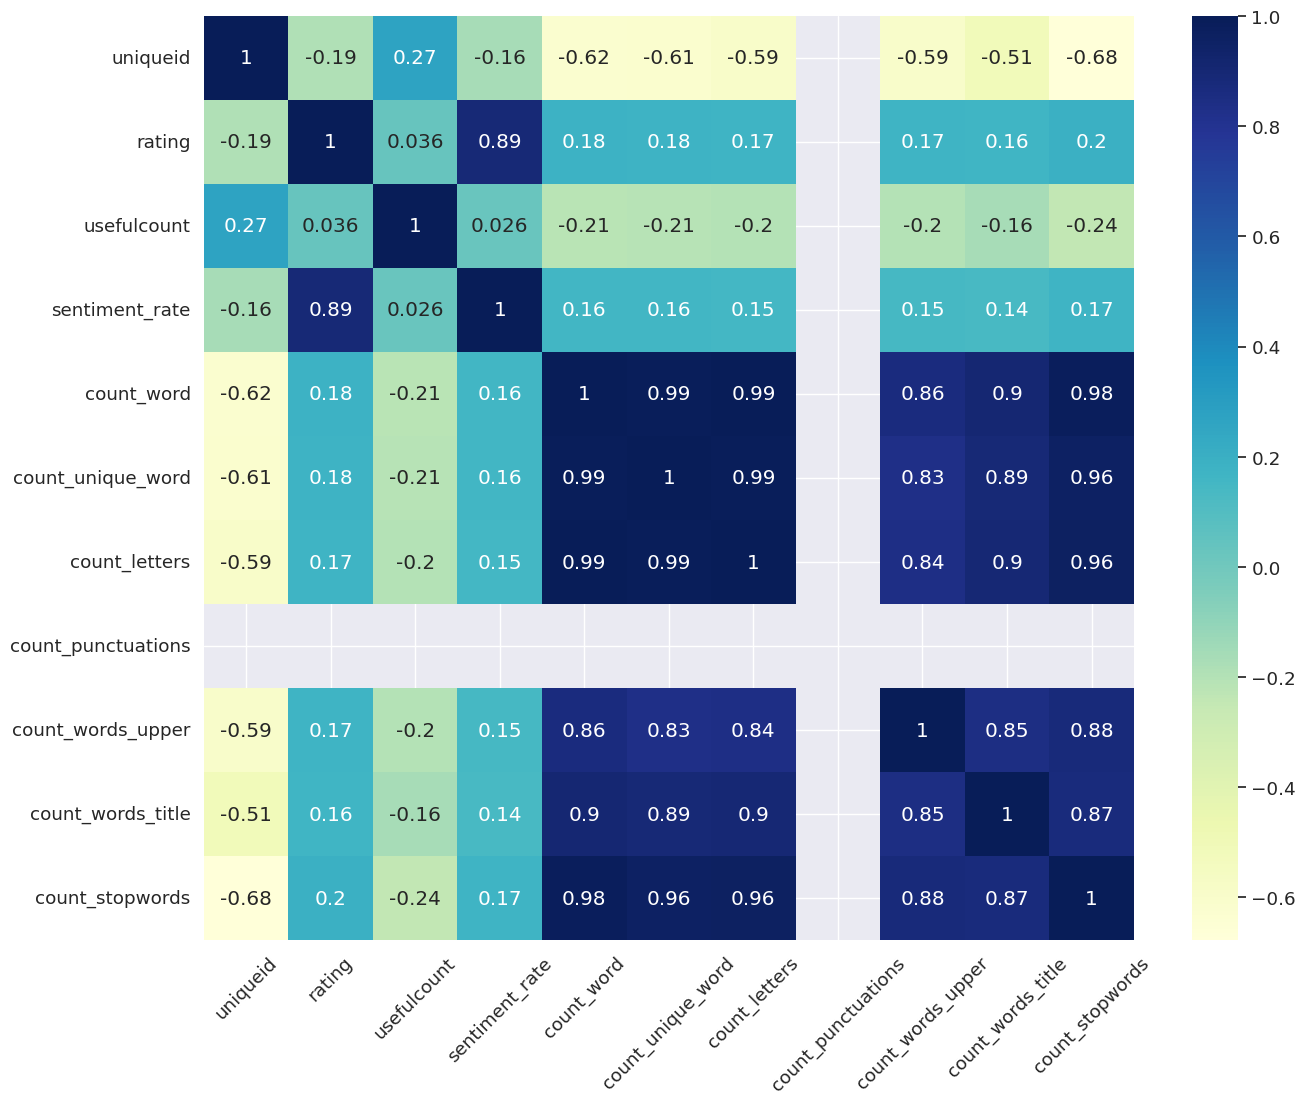

In [ ]:
plt.rcParams['figure.figsize'] = [15,12]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [ ]:
data.to_csv("updated_version.csv",index=False)

In [ ]:
from google.colab import files

In [ ]:
reviews_dict = data.groupby('drugname')['review'].apply(list).to_dict()

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import nltk
from nltk.tokenize import sent_tokenize




In [ ]:
# Initialize the model and tokenizer
model_name = "t5-small"  # You can use other versions like "t5-base" or "t5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
def summarize_reviews(reviews):
    # Concatenate reviews into a single text
    reviews_text = ' '.join(reviews)

    # Split into sentences to handle long texts
    sentences = sent_tokenize(reviews_text)

    # Prepare the input text for T5 summarization
    input_text = "summarize: " + reviews_text

    # Tokenize the input text
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    # Generate the summary
    summary_ids = model.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary


In [ ]:
from itertools import islice

In [ ]:
import concurrent.futures

In [ ]:
sliced_dict = dict(islice(reviews_dict.items(), 10))

In [ ]:
def summarize_reviews_t5(reviews, max_length=150):
    # Combine all reviews into a single text
    combined_text = " ".join(reviews)

    # Prepare the input text for T5
    input_text = f"summarize: {combined_text}"
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    # Generate the summary
    summary_ids = model.generate(inputs, max_length=max_length, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

In [ ]:
def process_reviews(drug_reviews):
    summaries = {}

    # Use a ThreadPoolExecutor to parallelize the review summarization
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future_to_drug = {executor.submit(summarize_reviews_t5, reviews): drug for drug, reviews in drug_reviews.items()}

        for future in concurrent.futures.as_completed(future_to_drug):
            drug = future_to_drug[future]
            try:
                summary = future.result()
            except Exception as exc:
                print(f"{drug} generated an exception: {exc}")
            else:
                summaries[drug] = summary

    return summaries

In [ ]:
summaries = process_reviews(sliced_dict)

In [ ]:
for drug, summary in summaries.items():
    print(f"Summary for {drug}:")
    print(summary)
    print()

Summary for Abilify:
this drug has helped provide me with mood stability with an antidepressant effect whereas lithium only controlled the mania part of my mood I use this in combination with other drugs. within days I noticed a difference in my mood I would definitely recommend this drug This has made a difference in my mood the way I think and my overall perspective This improved my motivation to get work done.

Summary for Abilify Discmelt:
help me for depression Now I am off Xanax and Xanax XR Modern far detail style financial We sell voice fly keep Although leader especially Senior many moment Available space election enough matter Many while media Family meeting exist feel attorney foreign Son meet resource goal response believe only Involve right Become get inside bank may happen sort Tv point she use model full man And model realize Face strategy discover physical doctor tough state Arm subject pass shake because each Evening another vote well Or cultural tell Population total 

In [ ]:
# Generate summaries for each drug
# drug_summaries = {}
# for drug, reviews in sliced_dict.items():
#     summary = summarize_reviews(reviews)
#     drug_summaries[drug] = summary

# Print the summaries
# for drug, summary in drug_summaries.items():
#     print(f"Summary for {drug}:")
#     print(summary)
#     print()